# Normal Distributions

In [2]:
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

### One Dimension

In [3]:
def normalpdf_1d(X,mean,sigma2):
    return np.exp(-0.5*np.square(X-mean)/sigma2)/np.sqrt(2*np.pi*sigma2)

In [4]:
# create plot of 1d normal probability distribution function
npoint = 100
X = np.linspace(-5,5,npoint)
Z1 = normalpdf_1d(X,0,1)
Z2 = normalpdf_1d(X,0.5,4)
Z3 = normalpdf_1d(X,-1,0.25)

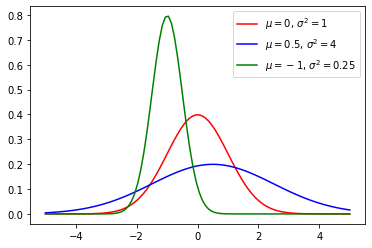

In [5]:
# plot pdf
plt.figure()
plt.plot(X,Z1,"r-",label="$\mu=0$, $\sigma^2=1$")
plt.plot(X,Z2,"b-",label="$\mu=0.5$, $\sigma^2=4$")
plt.plot(X,Z3,"g-", label="$\mu=-1$, $\sigma^2=0.25$")
plt.legend()

### Two Dimensions

In [6]:
def normalpdf(X,mean,Sigma):
    nsample = X.shape[1]
    Z = np.zeros((1,nsample))
    for i in range(nsample):
        Z[0,i] = np.exp(-0.5*np.matmul((X[:,[i]]-mean).T,np.matmul(np.linalg.inv(Sigma),X[:,[i]]-mean)))/(2*np.pi)/np.sqrt(np.linalg.det(Sigma))
    return Z

### Surface Plot

In [12]:
npoint = 100
Cov = np.array([[1,-0.5],[-0.5,2]])
mean = np.array([[0.5],[0.5]])
xmax = mean[0,0]+3
xmin = mean[0,0]-3
ymax = mean[1,0]+3
ymin = mean[1,0]-3
Xval,Yval = np.meshgrid(np.linspace(xmin,xmax,npoint),np.linspace(xmin,xmax,npoint))
X = np.concatenate((np.reshape(Xval,(1,npoint*npoint)),np.reshape(Yval,(1,npoint*npoint))),axis=0)
Z = normalpdf_2d(X,mean,Cov)
Zval = np.reshape(Z,(npoint,npoint))

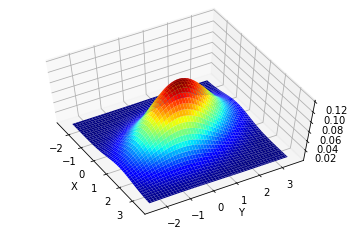

In [13]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_surface(Xval,Yval,Zval,cmap=cm.jet)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.view_init(60, -30)

### Contours in x0-x1 plane

Sigma: [2.20710678 0.79289322]


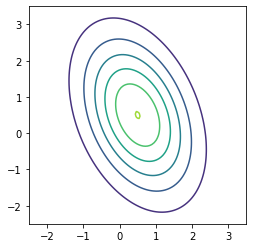

In [14]:
# plot contours of normal pdf in 2d
fig,ax = plt.subplots()
ax.set_aspect("equal")
plt.contour(Xval,Yval,Zval)
U,Sigma,Vt = np.linalg.svd(Cov)
print("Sigma: {}".format(Sigma))

### Create contour using Matplotlib Ellipse

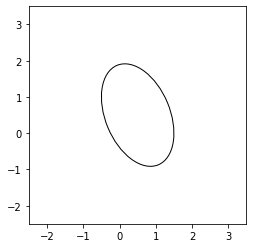

In [16]:
fig,ax  = plt.subplots()
ax.set_aspect("equal")
Sigma0 = np.sqrt(Sigma[0])
Sigma1 = np.sqrt(Sigma[1])
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
# compute angle - convert from radians to degrees
angle = np.arctan(U[1][0]/(U[0,0]+1e-10))*180/np.pi
ellipse = Ellipse(xy=np.squeeze(mean),width=2*Sigma0,height=2*Sigma1,angle=angle, fill=False)
ax.add_patch(ellipse)